In [227]:
from scipy.io import loadmat

import pandas as pd
import numpy as np

from scipy.optimize import fmin_cg

import copy

import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
loc = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex4\ex4\ex4data1.mat'
mat_data = loadmat(loc)
data_x = mat_data['X']
data_y = mat_data['y']

In [151]:
data_y.shape

(5000, 1)

In [91]:
# change the label 10 back to 0
#data_y[data_y == 10] = 0

# here for this assignment, don't change 10 to 0!!! since the weights provided was based on label 10!!! 
# if change to 0, the cost test result would be around 10.44
# if stay 10, it would be 0.287629, the correct reference provided by the writeup!

In [5]:
# load provided weights
loc = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex4\ex4\ex4weights.mat'
mat = loadmat(loc)
theta1 = mat['Theta1']
theta2 = mat['Theta2']

In [33]:
theta1.shape

(25, 401)

In [6]:
#data_x.shape
#theta1.shape - 25 * 401
#theta2.shape - 10 * 26

In [7]:
t1_f = theta1.flatten()
t2_f = theta2.flatten()
t = np.append(t1_f, t2_f)
t.shape

(10285,)

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [84]:
def mReform(x, k):
    m = x.shape[0]
    mat = np.zeros((m, 1))
    for i in range(k):
        label = (x == i+1).astype(int)
        mat = np.hstack((mat, label))
    return mat[:, 1:]

In [86]:
testy = mReform(data_y, 10)
testy

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [17]:
a1 = np.arange(9).reshape(3, 3)
b1 = np.array([
    [3, 1, 2],
    [9, 1, 5],
    [7, 4, 6]
])
b1

array([[3, 1, 2],
       [9, 1, 5],
       [7, 4, 6]])

In [97]:
b1 **2

array([[ 9,  1,  4],
       [81,  1, 25],
       [49, 16, 36]], dtype=int32)

In [18]:
a1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [32]:
 (- a1 - b1)

array([[ -3,  -2,  -4],
       [-12,  -5, -10],
       [-13, -11, -14]])

In [19]:
np.multiply(a1, b1)

array([[ 0,  1,  4],
       [27,  4, 25],
       [42, 28, 48]])

In [20]:
np.multiply(a1, b1).sum()

179

In [24]:
np.log(b1)

array([[1.09861229, 0.        , 0.69314718],
       [2.19722458, 0.        , 1.60943791],
       [1.94591015, 1.38629436, 1.79175947]])

In [25]:
np.multiply(np.log(b1), a1)

array([[ 0.        ,  0.        ,  1.38629436],
       [ 6.59167373,  0.        ,  8.04718956],
       [11.67546089,  9.70406053, 14.33407575]])

In [94]:
def nnCost(theta, hid_size, x, y, num_labels, lam):
    # assume the network only have 1 input layer, 1 hidden layer, and 1 output layer
    
    m = x.shape[0]
    
    # reshape theta1 and theta2
    inp_size = x.shape[1]
    theta_cutoff = hid_size * (inp_size + 1)
    theta1 = theta[:theta_cutoff].reshape((hid_size, inp_size + 1))
    theta2 = theta[theta_cutoff:].reshape((num_labels, hid_size + 1))
    #print ('theta1', type(theta1), theta1.shape)
    #print ('theta2', type(theta2), theta2.shape)

    
    # adjust x and insert x0 = 1
    x = np.insert(x, 0, 1, axis = 1)
    # x.shape - 5000 * 401
    
    # compute hidden layer value
    hidden = sigmoid(x.dot(theta1.T))
    #print ('hidden layer', type(hidden), hidden.shape)
    # hidden.shape - 5000 * 25
    
    # add bias unit to hidden layer
    hid = np.insert(hidden, 0, 1, axis = 1)
    #print ('hid+bias unit', type(hid), hid.shape)
    # hid.shape - 5000 * 26
    
    pred = sigmoid(hid.dot(theta2.T))
    #print ('pred', type(pred), pred.shape)
    # pred.shape - 5000 * 10
    
    #out = np.argmax(pred, axis = 1).reshape((m, 1))
    #print ('out', type(out), out.shape)
    #out = mReform(out, num_labels)
    
    # reform y to matrix
    y = mReform(y,  num_labels)
    # turn y into 5000 * 10 matrix
    
    # compute cost

    
    j =  ( - np.multiply(y, np.log(pred)) - np.multiply(1 - y, np.log(1 - pred))).sum() / m
    
    # perform the same when using for-loop
    #cost = 0
    #for i in range(pred.shape[0]):
    #    for j in range(pred.shape[1]):
    #        cost = cost - y[i, j] * np.log(pred[i, j]) - (1 - y[i, j]) * np.log(1 - pred[i, j])
    
    return j

In [100]:
# test nnCost

testC = nnCost(t, 25, data_x, data_y, 10, 1)
testC
# ~0.287629

#tt1, tt2 = nnCost(t, 25, data_x, data_y, 10, 1)
#if ((tt1 == theta1).all() == True) and ((tt2 == theta2).all() == True):
#    print ("theta reshape test passed")

0.2876291651613189

In [98]:
def nnCostReg(theta, hid_size, x, y, num_labels, lam):    
    m = x.shape[0]
    
    # reshape theta1 and theta2
    inp_size = x.shape[1]
    theta_cutoff = hid_size * (inp_size + 1)
    theta1 = theta[:theta_cutoff].reshape((hid_size, inp_size + 1))
    theta2 = theta[theta_cutoff:].reshape((num_labels, hid_size + 1))
    #theta1.shape - 25 * 401
    #theta2.shape - 10 * 26
    
    # adjust x and insert x0 = 1
    x = np.insert(x, 0, 1, axis = 1)
    # x.shape - 5000 * 401
    
    # compute hidden layer value
    hidden = sigmoid(x.dot(theta1.T))
    # hidden.shape - 5000 * 25
    
    # add bias unit to hidden layer
    hid = np.insert(hidden, 0, 1, axis = 1)
    # hid.shape - 5000 * 26
    
    pred = sigmoid(hid.dot(theta2.T))
    # pred.shape - 5000 * 10
    
    # reform y to matrix
    y = mReform(y,  num_labels)
    # turn y into 5000 * 10 matrix
    
    # compute cost
    j =  ( - np.multiply(y, np.log(pred)) - np.multiply(1 - y, np.log(1 - pred))).sum() / m
                                          
    # Regularition
    reg = ((theta1[:, 1:] ** 2).sum() + (theta2[:, 1:] ** 2).sum()) * lam / 2 / m
    
    return j + reg

In [99]:
testR = nnCostReg(t, 25, data_x, data_y, 10, 1)
testR
# ~0.38377

0.38376985909092365

In [101]:
def sigmdGrad(x):
    return np.multiply(sigmoid(x), 1 - sigmoid(x))

In [107]:
def randInit(l_in, l_out):
    epsilon = 0.12
    sample = np.random.uniform(-epsilon, epsilon, l_out * (l_in + 1))
    return sample.reshape(l_out, l_in + 1)

In [176]:
def backprop(theta, hid_size, x, y, num_labels, lam):
    m = x.shape[0]
    inp_size = x.shape[1]
    theta_cutoff = hid_size * (inp_size + 1)
    theta1 = theta[:theta_cutoff].reshape((hid_size, inp_size + 1))
    theta2 = theta[theta_cutoff:].reshape((num_labels, hid_size + 1))
    
    x = np.insert(x, 0, 1, axis = 1)
    hidden = sigmoid(x.dot(theta1.T))
    # a2 = hid
    a2 = np.insert(hidden, 0, 1, axis = 1)
    # a3 = pred
    a3 = sigmoid(a2.dot(theta2.T))
    y = mReform(y,  num_labels)
    
    error3 = a3 - y
    #print ('error3', error3.shape)
    #error3.shape - 5000 * 10
    
    # theta1 - 25 * 401
    # theta2 - 10 * 26
    # add 1 column to z2
    z2 = x.dot(theta1.T)
    z2 = np.insert(z2, 0, 1, axis = 1)
    # z2.shape - 5000 * 26
    
    gz2 = sigmdGrad(z2)
    # gz2.shape - 5000 * 26
    
    error2 = np.multiply(error3.dot(theta2), gz2)
    #print ('error2', error2.shape)
    #error2.shape - 5000 * 26
    
    delta2 = error3.T.dot(a2)
    # print ('delta2', delta2.shape)
    # delta2.shape - 10 * 26
    
    # ignore error2[:,0]
    delta1 = error2[:, 1:].T.dot(x)
    # print ('delta1', delta1.shape)
    # delta1.shape - 25 * 401
    
    delta1 = (delta1 / m).flatten()
    delta2 = (delta2 / m).flatten()
    
    delta = np.append(delta1, delta2)
    #print ('delta', delta.shape)
    
    return delta

In [127]:
testB = backprop(t, 25, data_x, data_y, 10, 1)
#testB

delta (10285,)


In [139]:
def compGrad(theta, hid_size, x, y, num_labels, lam):
    epsilon = 0.0001
    grad = np.zeros(theta.shape)
    for i in range(len(theta)):
        theta_pos = copy.copy(theta)
        theta_neg = copy.copy(theta)
        theta_pos[i] += epsilon
        theta_neg[i] -= epsilon
        
        grad[i] = (nnCost(theta_pos, hid_size, x, y, num_labels, lam) - nnCost(theta_neg, hid_size, x, y, num_labels, lam)) /2/epsilon
    
    return grad

In [177]:
def checkGrad(in_size, hid_size, n_labels, m, lam=1):
    # prep data
    theta1 = randInit(in_size, hid_size)
    #print ("theta1", theta1.shape)
    theta2 = randInit(hid_size, n_labels)
    #print ("theta2", theta2.shape)
    x = randInit(in_size - 1, m)
    #print ("x", x.shape)
    y = (np.random.randint(1, n_labels+1, m)).reshape(m, 1)
    
    t1 = theta1.flatten()
    t2 = theta2.flatten()
    t = np.append(t1, t2)
    
    gradNN = backprop(t, hid_size, x, y, n_labels, lam)
    gradC = compGrad(t, hid_size, x, y, n_labels, lam)
    
    diff = abs(gradNN - gradC)
    
    return (diff <= 1e-9).all() == True

In [179]:
if checkGrad(3, 5, 3, 5) == True:
    print ('Gradient check passed!')

Gradient check passed!


In [173]:
#yy = np.random.randint(1, 6, size=10)
#yy = yy.reshape(10, 1)

#yy = mReform(yy, 5)
#yy

In [201]:
def backpropReg(theta, hid_size, x, y, num_labels, lam):
    m = x.shape[0]
    inp_size = x.shape[1]
    theta_cutoff = hid_size * (inp_size + 1)
    theta1 = theta[:theta_cutoff].reshape((hid_size, inp_size + 1))
    theta2 = theta[theta_cutoff:].reshape((num_labels, hid_size + 1))
    
    x = np.insert(x, 0, 1, axis = 1)
    hidden = sigmoid(x.dot(theta1.T))
    # a2 = hid
    a2 = np.insert(hidden, 0, 1, axis = 1)
    # a3 = pred
    a3 = sigmoid(a2.dot(theta2.T))
    y = mReform(y,  num_labels)
    
    error3 = a3 - y
    #error3.shape - 5000 * 10
    
    # theta1 - 25 * 401
    # theta2 - 10 * 26
    # add 1 column to z2
    z2 = x.dot(theta1.T)
    z2 = np.insert(z2, 0, 1, axis = 1)
    # z2.shape - 5000 * 26
    
    gz2 = sigmdGrad(z2)
    # gz2.shape - 5000 * 26
    
    error2 = np.multiply(error3.dot(theta2), gz2)
    #error2.shape - 5000 * 26
    
    delta2 = error3.T.dot(a2)
    # delta2.shape - 10 * 26
    
    # ignore error2[:,0]
    delta1 = error2[:, 1:].T.dot(x)
    # delta1.shape - 25 * 401
    
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    reg1 = theta1 * lam / m
    reg1[:, 0] = 0
    reg2 = theta2 * lam / m
    reg2[:, 0] = 0
    
    delta1 += reg1
    delta2 += reg2
    
    delta = np.append(delta1.flatten(), delta2.flatten())
    #print ('delta', delta.shape)
    
    return delta

In [202]:
def compGradReg(theta, hid_size, x, y, num_labels, lam):
    epsilon = 0.0001
    grad = np.zeros(theta.shape)
    for i in range(len(theta)):
        theta_pos = copy.copy(theta)
        theta_neg = copy.copy(theta)
        theta_pos[i] += epsilon
        theta_neg[i] -= epsilon
        
        grad[i] = (nnCostReg(theta_pos, hid_size, x, y, num_labels, lam) - nnCostReg(theta_neg, hid_size, x, y, num_labels, lam)) /2/epsilon
    
    return grad

In [203]:
def checkGradReg(in_size, hid_size, n_labels, m, lam=1):
    # prep data
    theta1 = randInit(in_size, hid_size)
    #print ("theta1", theta1.shape)
    theta2 = randInit(hid_size, n_labels)
    #print ("theta2", theta2.shape)
    x = randInit(in_size - 1, m)
    #print ("x", x.shape)
    y = (np.random.randint(1, n_labels+1, m)).reshape(m, 1)
    
    t1 = theta1.flatten()
    t2 = theta2.flatten()
    t = np.append(t1, t2)
    
    gradNN = backpropReg(t, hid_size, x, y, n_labels, lam)
    gradC = compGradReg(t, hid_size, x, y, n_labels, lam)
    
    diff = abs(gradNN - gradC)
    
    return (diff <= 1e-9).all() == True

In [204]:
if checkGradReg(3, 5, 3, 5) == True:
    print ('Gradient check passed!')
else: print ('Go check again')

Gradient check passed!


In [231]:
# learn the model with fmin_cg
# initialize theta
theta1 = randInit(400, 25)
theta2 = randInit(25, 10)
theta0 = np.append(theta1.flatten(), theta2.flatten())
lam = 1
hid_size = 25
n_labels = 10
x = data_x
y = data_y

myargs = (hid_size, x, y, n_labels, lam)

# train the model
train = fmin_cg(nnCostReg, theta0, args = myargs, fprime = backpropReg, maxiter = 400)
#train = fmin_cg(nnCostReg, theta0, args = myargs, fprime = backpropReg)

         Current function value: 0.319066
         Iterations: 400
         Function evaluations: 952
         Gradient evaluations: 952


In [232]:
train

array([-2.30460907e+00, -2.58706804e-06, -4.23571566e-06, ...,
        1.61295836e+00, -3.24100744e-01,  1.39661960e+00])

In [214]:
def predict(theta, hid_size, x, num_labels):
    m = x.shape[0]
    inp_size = x.shape[1]
    theta_cutoff = hid_size * (inp_size + 1)
    theta1 = theta[:theta_cutoff].reshape((hid_size, inp_size + 1))
    theta2 = theta[theta_cutoff:].reshape((num_labels, hid_size + 1))
    
    x = np.insert(x, 0, 1, axis = 1)
    hidden = sigmoid(x.dot(theta1.T))
    # a2 = hid
    a2 = np.insert(hidden, 0, 1, axis = 1)
    # a3 = pred
    a3 = sigmoid(a2.dot(theta2.T))
    pred = np.argmax(a3, axis = 1)
    pred += 1
    
    return pred

In [215]:
def accuracy(y, pred):
    y = y.flatten()
    m = len(y)
    count = (y == pred).sum()
    accuracy = count / m
    return accuracy

In [233]:
pred = predict(train, 25, data_x, 10)
accu = accuracy(data_y, pred)
accu
# the accuracy is 99.42% when lambda is 1
# accu = 98.62% when lambda is 2
# accu = 97.66% when lambda is 3

0.9942

In [234]:
# visualize hidden layer
theta1 = train[:10025].reshape(25, 401)
tt1 = theta1[:, 1:]
tt1.shape

(25, 400)

In [225]:
def toMatrix(data, row, col):
    mat = np.zeros(shape = (row, col))
    m = 0
    for j in range(col):
        for i in range(row):
            mat[i, j] = data[m]
            m += 1
    return mat

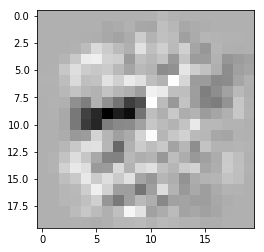

In [235]:
test2 = toMatrix(tt1[3, :], 20, 20)
imgplot = plt.imshow(test2, cmap='gray')